In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Load results
results = []
for file in os.listdir("logs_linear_models"):
    if file.endswith(".csv"):
        results.append(pd.read_csv(f"logs_linear_models/{file}"))

results = pd.concat(results)

In [3]:
print(results)

                model  sample_size  avg_time  std_time     version
0                 OLS         1000  0.001086  0.003259  sega_learn
1               Ridge         1000  0.004897  0.004195  sega_learn
2               Lasso         1000  0.478272  0.007970  sega_learn
3            Bayesian         1000  0.000799  0.000598  sega_learn
4              RANSAC         1000  0.011600  0.001201  sega_learn
..                ...          ...       ...       ...         ...
19              Ridge      1000000  0.000261  0.000547     sklearn
20              Lasso      1000000  0.001687  0.003413     sklearn
21           Bayesian      1000000  0.171928  0.004996     sklearn
22             RANSAC      1000000  0.266865  0.046933     sklearn
23  PassiveAggressive      1000000  0.004600  0.000664     sklearn

[72 rows x 5 columns]


In [4]:
# Plot the results
def plot_results(results, title):
    # Set the style of seaborn
    sns.set_theme(style="whitegrid")

    # Create a line plot for the results
    plt.figure(figsize=(12, 6))

    # Split the results by version
    results_sega = results[results["version"] == "sega_learn"]
    results_sega_pypy = results[results["version"] == "sega_learn_pypy"]
    results_sklearn = results[results["version"] == "sklearn"]

    # Plot mean times
    sns.lineplot(
        x="sample_size",
        y="avg_time",
        markers=True,
        dashes=False,
        data=results_sega,
        label="sega_learn",
        color="blue",
    )
    sns.lineplot(
        x="sample_size",
        y="avg_time",
        markers=True,
        dashes=False,
        data=results_sega_pypy,
        label="sega_learn_pypy",
        color="orange",
    )
    sns.lineplot(
        x="sample_size",
        y="avg_time",
        markers=True,
        dashes=False,
        data=results_sklearn,
        label="sklearn",
        color="green",
    )

    # Fill standard deviation areas
    plt.fill_between(
        results_sega["sample_size"],
        results_sega["avg_time"] - results_sega["std_time"],
        results_sega["avg_time"] + results_sega["std_time"],
        alpha=0.3,
        color="blue",
    )

    plt.fill_between(
        results_sega_pypy["sample_size"],
        results_sega_pypy["avg_time"] - results_sega_pypy["std_time"],
        results_sega_pypy["avg_time"] + results_sega_pypy["std_time"],
        alpha=0.3,
        color="orange",
    )

    plt.fill_between(
        results_sklearn["sample_size"],
        results_sklearn["avg_time"] - results_sklearn["std_time"],
        results_sklearn["avg_time"] + results_sklearn["std_time"],
        alpha=0.3,
        color="green",
    )

    plt.xscale("log")
    plt.title(title)
    plt.xlabel("Sample Size (log scale)")
    plt.ylabel("Time (s)")
    plt.legend(title="Legend", title_fontproperties={"weight": "bold"})
    plt.tight_layout()
    plt.grid(True)
    plt.savefig(f"plots/linear_models_{title}.png")
    plt.show()

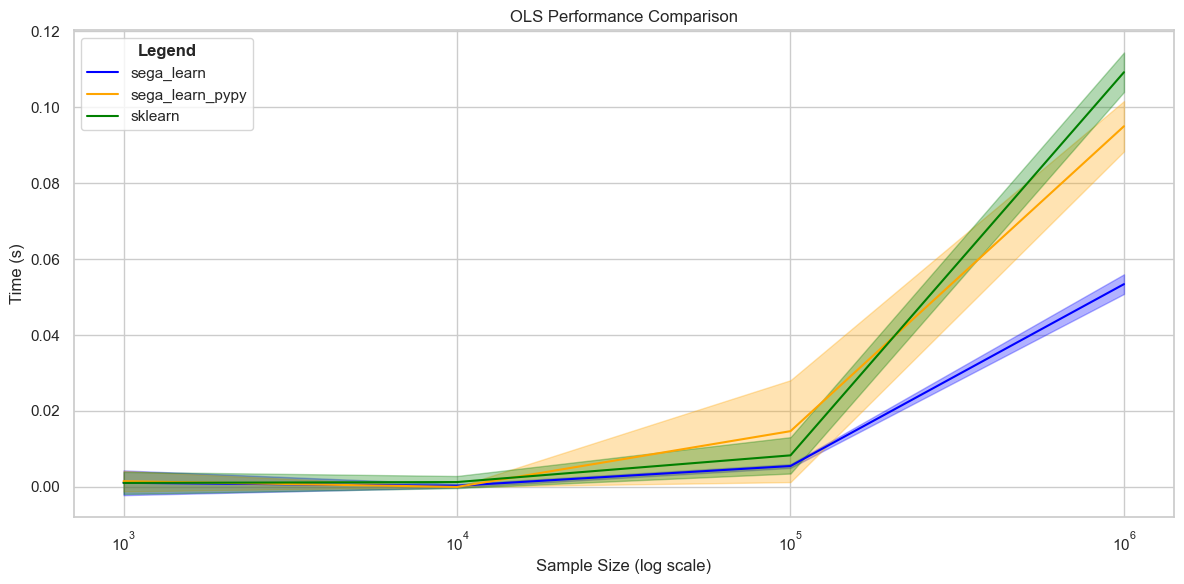

In [5]:
plot_results(results[results["model"] == "OLS"], "OLS Performance Comparison")

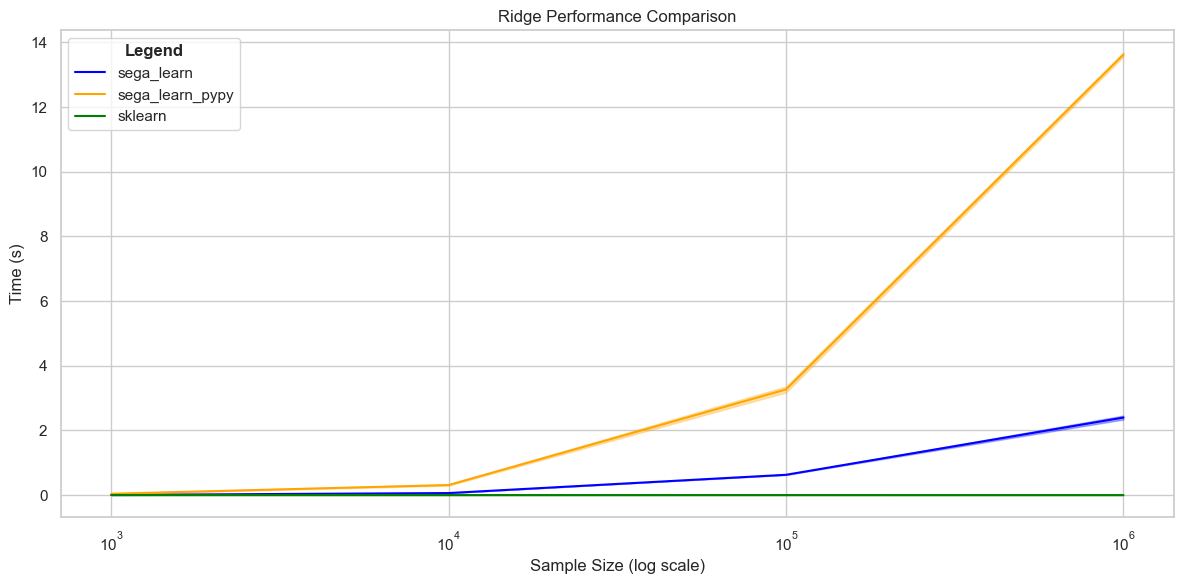

In [6]:
plot_results(results[results["model"] == "Ridge"], "Ridge Performance Comparison")

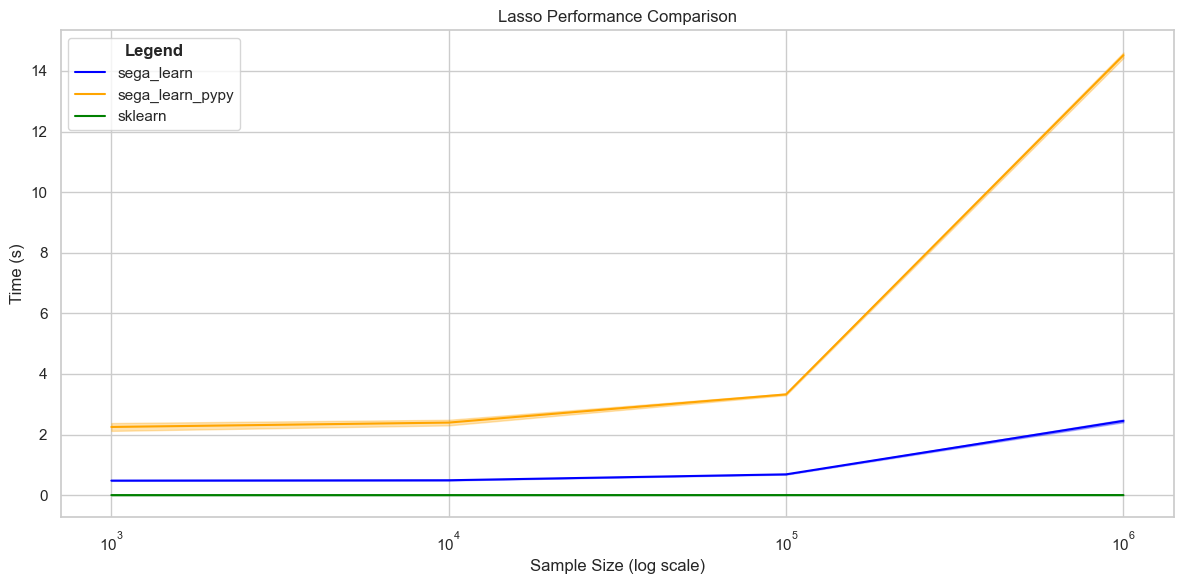

In [7]:
plot_results(results[results["model"] == "Lasso"], "Lasso Performance Comparison")

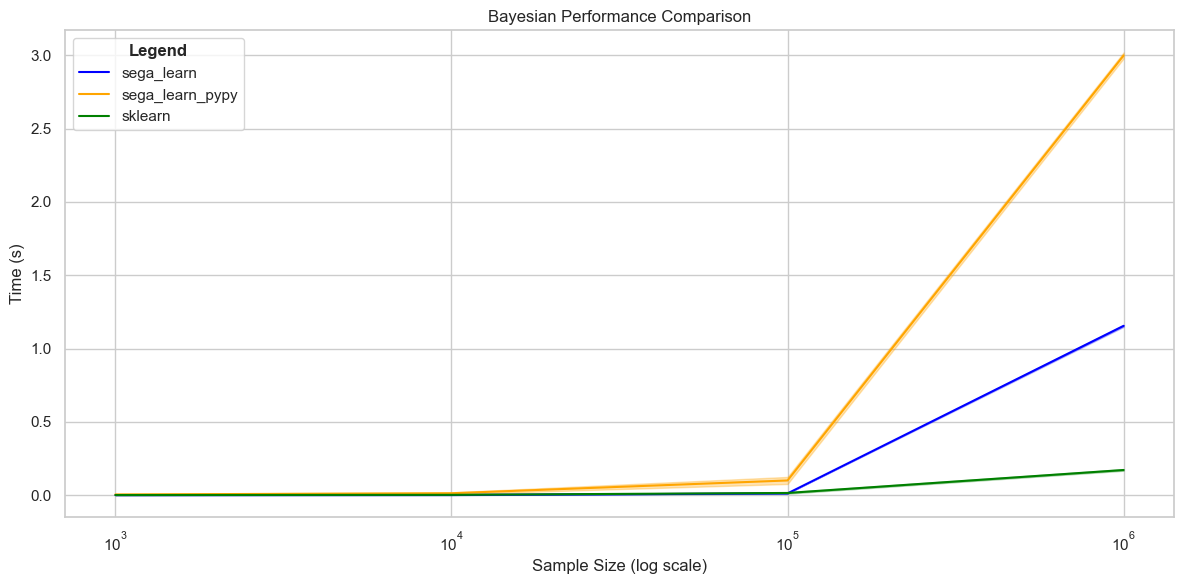

In [8]:
plot_results(results[results["model"] == "Bayesian"], "Bayesian Performance Comparison")

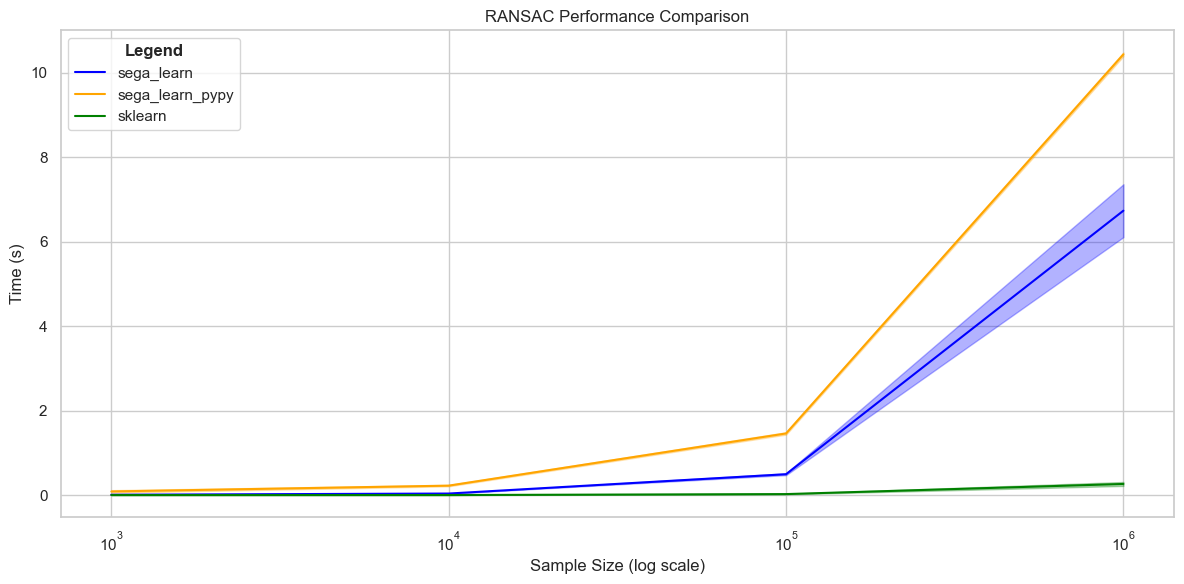

In [9]:
plot_results(results[results["model"] == "RANSAC"], "RANSAC Performance Comparison")

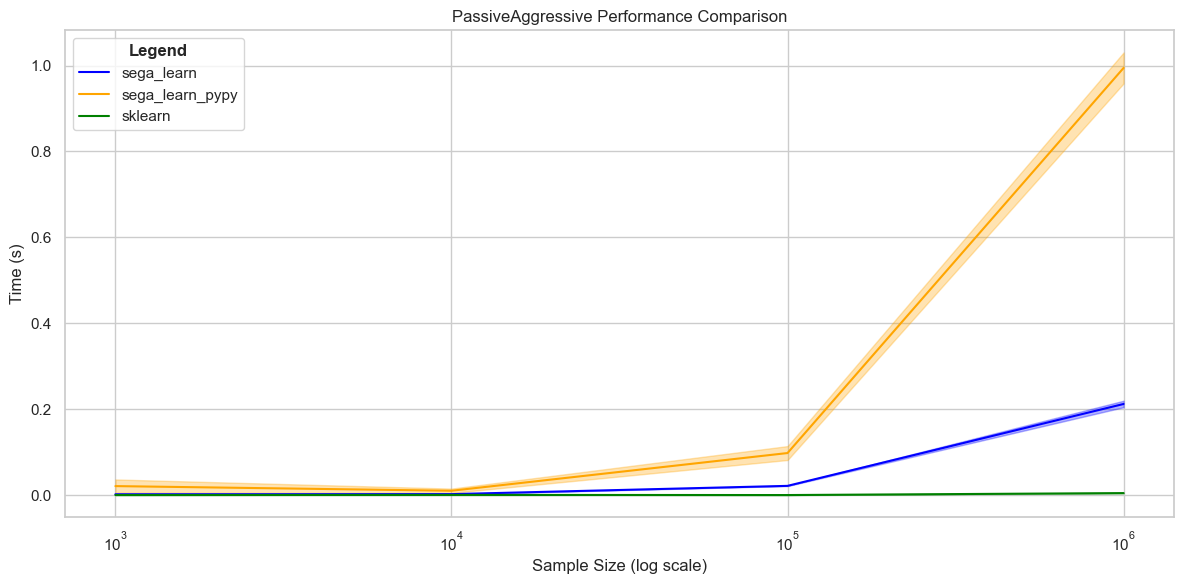

In [10]:
plot_results(
    results[results["model"] == "PassiveAggressive"],
    "PassiveAggressive Performance Comparison",
)